### Chapter 14 심층신경망과 딥러닝

11. MNIST : Flatten, Dropout, sparse_categorical_crossentropy 적용

In [2]:
########################################################################
# MNIST : Flatten, Dropout, sparse_categorical_crossentropy 적용 p.438
########################################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:

X_train = X_train / 255
X_test = X_test / 255

# One-Hot
# Y_train = tf.keras.utils.to_categorical(Y_train, 10)
# Y_test = tf.keras.utils.to_categorical(Y_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정

# modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"  # keras 2.x
# modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras"   # keras 3.x
modelpath="./model/mnist_model3(dropout).keras"  # best모델만 저장

# Best 모델 저장 콜백함수 정의
checkpointer = ModelCheckpoint(
    filepath=modelpath,   # 확장자: h5, hdf5 -> keras
    monitor='val_loss',                     # 모델 평가 기준을 검증 데이터의 loss로 지정
    verbose=1,                              # 파일 저장시 로그 출력(1), 출력안함(0:생략)
    save_best_only=True                     # 가장 좋은 모델만 저장
)

early_stopping = EarlyStopping(
    monitor='val_loss',         # 조기종료 조건을 체크하는 기준
    patience=5,                 # 5 epoch동안 개선이 없으면 학습 조기 종료
    restore_best_weights=True   # 최적 가중치를 복원
)

# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    # validation_split=0.2,
                    epochs=1000, 
                    batch_size=100, 
                    verbose=1, 
                    callbacks=[early_stopping, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/1000
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - loss: 0.6104
Epoch 1: val_loss improved from None to 0.12623, saving model to ./model/mnist_model3(dropout).keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8914 - loss: 0.3562 - val_accuracy: 0.9609 - val_loss: 0.1262
Epoch 2/1000
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9472 - loss: 0.1760
Epoch 2: val_loss improved from 0.12623 to 0.09457, saving model to ./model/mnist_model3(dropout).keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9492 - loss: 0.1683 - val_accuracy: 0.9699 - val_loss: 0.0946
Epoch 3/1000
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9607 - loss: 0.1278
Epoch 3: val_loss improved from 0.09457 to 0.08168, saving model to ./model/mnist_model3(dropout).keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9606 - loss: 0.1313 - val_accuracy: 0.9731 - val_loss: 0.0817
Epoch 4/1000
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9681 - l

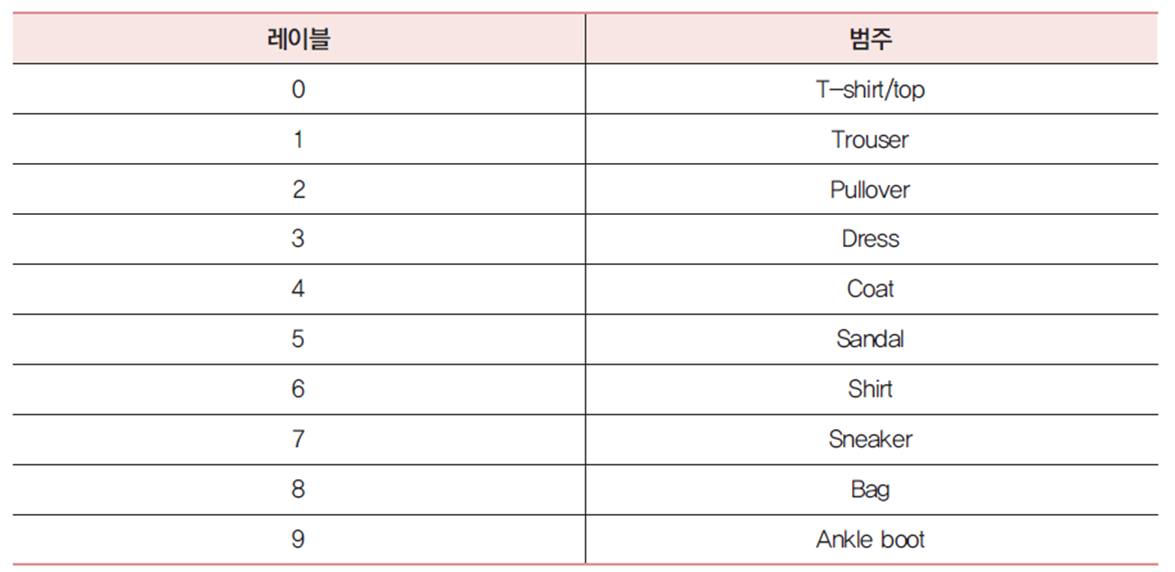

<Axes: >

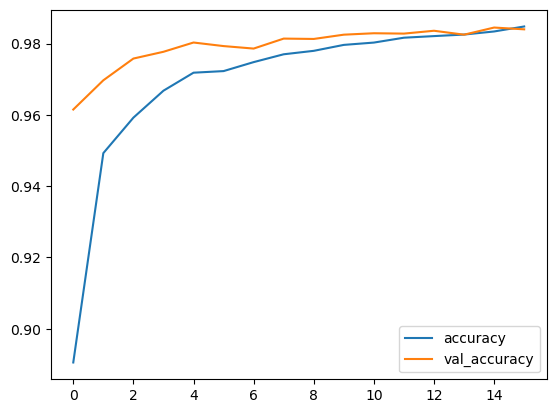

In [ ]:
import pandas as pd

df_history = pd.DataFrame(history.history)

# dropout 적용
df_history[['accuracy', 'val_accuracy']].plot()

<Axes: >

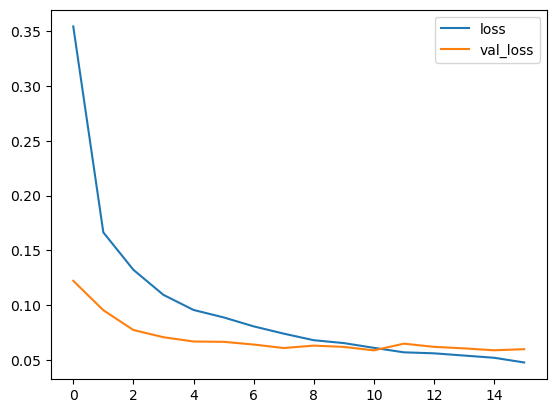

In [ ]:
# dropout 적용
df_history[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9824 - loss: 0.0571


[0.05706169456243515, 0.9824000000953674]